# Задание 1

Реализовать Q-Learning и сравнить его результаты с реализованными ранее алгоритмами: Cross-Entropy, Monte Carlo, SARSA в задаче Taxi-v3. Для сравнения как минимум нужно использовать графики обучения. Причем графики лучше делать относительно количества сгенерированных траекторий.

In [2]:
import pandas as pd

,epoch,reward,algorithm
0,0,-100.000,Cross-entropy
1,1,-344.926,Cross-entropy
2,2,-267.652,Cross-entropy
3,3,-223.642,Cross-entropy
4,4,-181.432,Cross-entropy


In [5]:
df = pd.read_csv("task4_1.csv")
df.head()

,epoch,reward,algorithm
0,0,-390.989,Cross-entropy
1,1,-383.893,Cross-entropy
2,2,-375.583,Cross-entropy
3,3,-363.390,Cross-entropy
4,4,-356.507,Cross-entropy


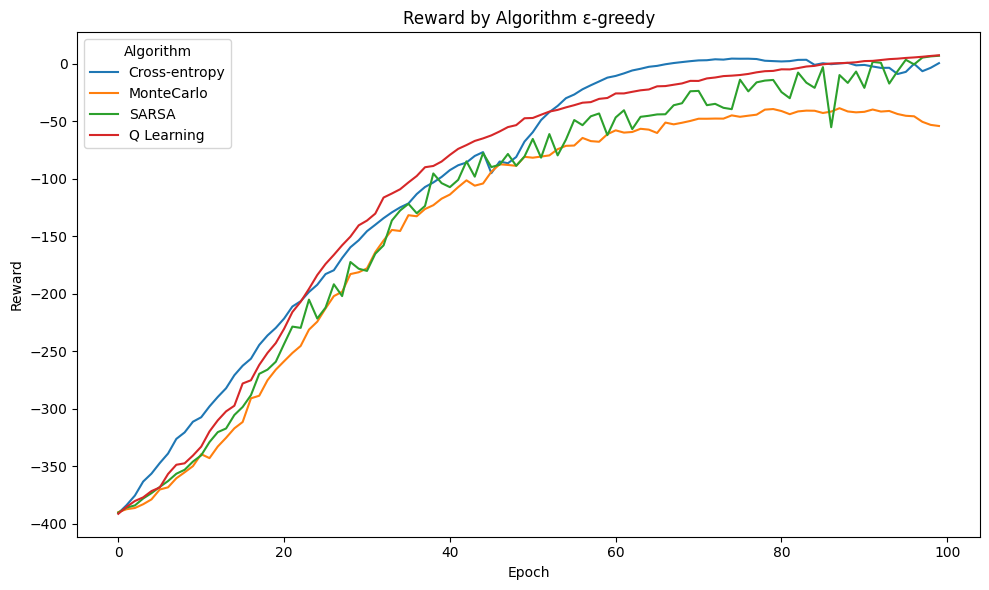

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='epoch', y='reward', hue='algorithm', markers=True)

# Set axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.title('Reward by Algorithm ε-greedy')

# Show legend
plt.legend(title='Algorithm')

# Show the plot
plt.tight_layout()
plt.show()

In [7]:
df = pd.read_csv("task1.csv")
df.head()

,epoch,reward,algorithm
0,0,-100.000,Cross-entropy
1,1,-344.926,Cross-entropy
2,2,-267.652,Cross-entropy
3,3,-223.642,Cross-entropy
4,4,-181.432,Cross-entropy


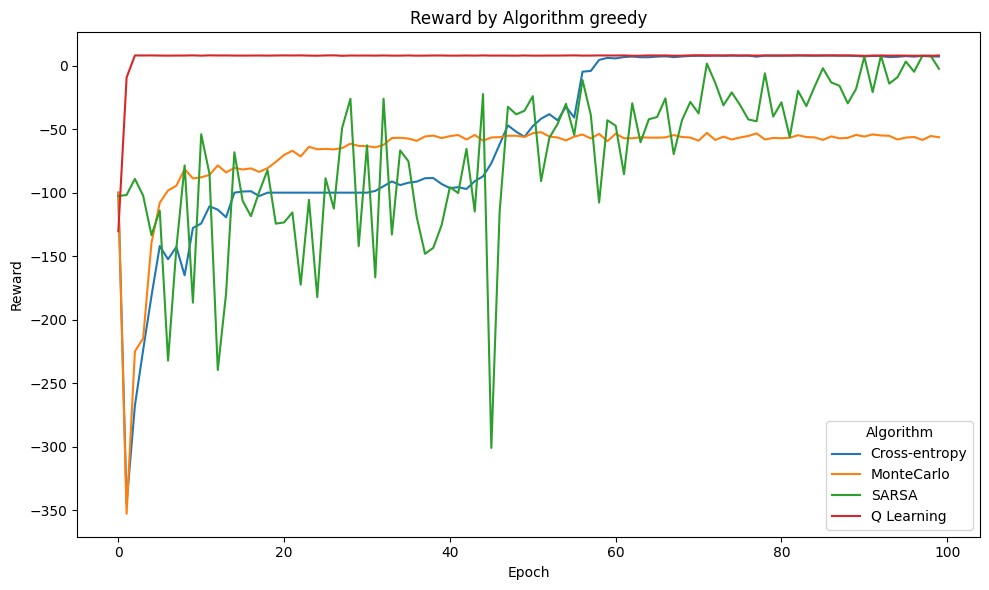

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='epoch', y='reward', hue='algorithm', markers=True)

# Set axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.title('Reward by Algorithm greedy')

# Show legend
plt.legend(title='Algorithm')

# Show the plot
plt.tight_layout()
plt.show()

Представлено два графика, первый для ε-жадной стратегии во время оценки, второй для жадной. Чтоб уравнять алгоритмы, в cross-entropy в каждую эпоху игралось 1000 траекторий, поэтому шаг оценки стратегии для остальных алгоритмов вызывался после каждого тысячного шага. На первом графике видно что алгоритмы сопоставимы по скорости схождения, но есть некоторые различия. Q Learninig показывает самое стабильное и быстрое обучение. SARSA и cross-entropy близки, но SARSA менее стабильна, скорее всего из-за относительно большого epsilon во время оценки стратегии иногда она делала неверные шаги, что сбивало алгоритм. Ближе к концу когда epsilon очень мал, эти три алгоритма показывают практические одинаковые результаты. Алгоритм Monte-Carlo так и не сошёлся к оптимальному значению и в процессе обучения всегда отставал от остальных. Как было отмечено на лекциях он не учитывает марковское свойство и не использует уравнения Беллмана, поэтому показывает результаты хуже.
Второй график в качестве оценки стратегии использовал всегда жадную стратегию, я привожу его, так как заметил интересные результаты. Q Learning пришёл к оптимальной стратегии очень быстро, всего за несколько тысяч итераций, а на первом графике его равномерный график был обусловлен исключительно случайными действиями из-за epsilon. SARSA и cross-entropy в начале очень нестабильны, очевидно, во многих состояниях значение далеко от оптимального, но жадный алгоритм никогда не свернёт с неверного пути. Алгоритм Monte-Carlo довольно быстро выходит на плато и так и не обучается полностью за предоставленное количество шагов.

# Задание 2

Дискретизировать (можно использовать numpy.round()) пространство состояний и обучить Агента решать CartPole-v1, Acrobot-v1, MountainCar-v0, или LunarLander-v2 (одну на выбор) методами Monte Carlo, SARSA и Q-Learning. Сравнить результаты этих алгоритмов и реализованного ранее алгоритма Deep Cross-Entropy на графиках.

Использовалась среда CartPole-v1

In [25]:
df = pd.read_csv("task2_2.csv")
df.head()

,epoch,reward,algorithm
0,0,19.9,MonteCarlo
1,1,18.9,MonteCarlo
2,2,20.0,MonteCarlo
3,3,26.7,MonteCarlo
4,4,30.3,MonteCarlo


In [26]:
dce = pd.read_csv("task2_3.csv")
df = pd.concat([df, dce], ignore_index=True)
df.head()

,epoch,reward,algorithm
0,0,19.9,MonteCarlo
1,1,18.9,MonteCarlo
2,2,20.0,MonteCarlo
3,3,26.7,MonteCarlo
4,4,30.3,MonteCarlo


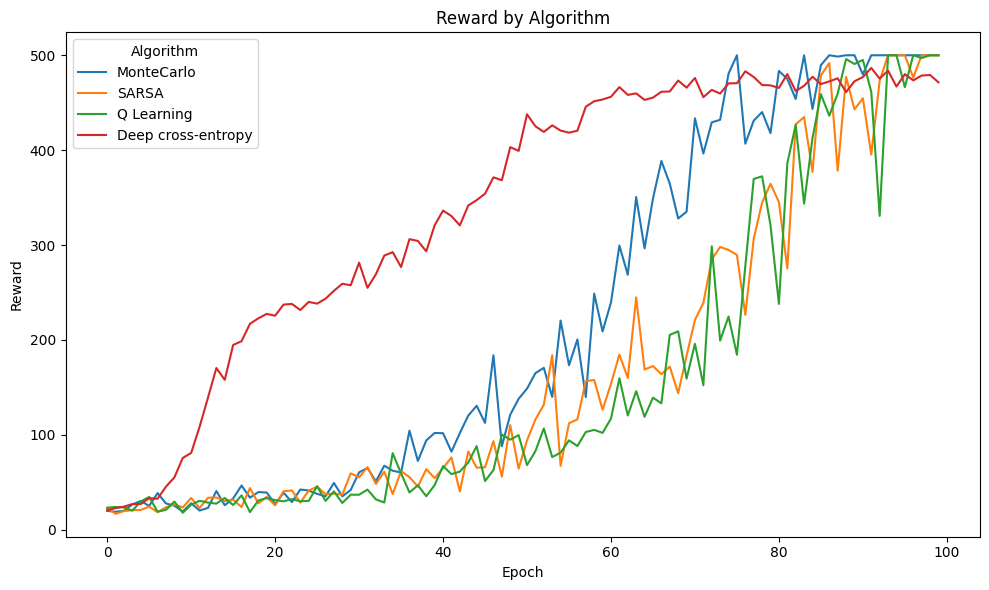

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='epoch', y='reward', hue='algorithm', markers=True)

# Set axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.title('Reward by Algorithm')

# Show legend
plt.legend(title='Algorithm')

# Show the plot
plt.tight_layout()
plt.show()

В качестве дискретизации каждая из 4 компонент состояния разбивалась на 20 отрезков, соответственно количество состояний было 20^4. Тема дискретизации достаточно сложная и в данной работе не рассматривается, есть уверенность, что понимая как устроена среда, можно сделать намного более лучшую дискретизацию, нелинейную и с разным разбиением для каждой компоненты. В данной работе намеренно использовалась наиболее простая равномерная линейная дискретизация всех компонент. Некоторые компоненты в интервале [-inf, +inf], поэтому для граничных значений использовались константы [-3, 3].

В графиках видно существенное различие метода deep cross-entropy от остальных методов, он начинает обучаться сразу и медленно движется к максимальной награде. Остальные алгоритмы тратят довольно много времени заполняя огромную таблицу состояний, прежде чем значения там станут достаточно точными, чтоб на их основании политика могла иметь смысл. Другой причиной является epsilon жадная стратегия, которая в начале делает довольно много случайных действий. Метод Monte Carlo достиг максимальных значений раньше SARSA и Q Learning, это неожиданно. Предположу, чтоб при данном разбиении на дискретные состояния, большое количество траекторий похожи, поэтому Q значения в таблице в методе Monte Carlo достаточно точны, в то время как SARSA и Q Learning используют temporal-difference и неточные значения в других состояниях замедляют обучение. Несмотря на это, кажется, что при другом методе дискретизации Q Learning и SARSA должны справляться лучше, чем Monte Carlo.

# Задание 3

Придумать стратегию для выбора epsilon позволяющую агенту наилучшим образом решать Taxi-v3 алгоритмом Monte Carlo.

In [40]:
df = pd.read_csv("task3.csv")
df.head()

,epoch,reward,strategy
0,0,-391.28,Linear
1,1,-388.37,Linear
2,2,-388.86,Linear
3,3,-377.74,Linear
4,4,-376.10,Linear


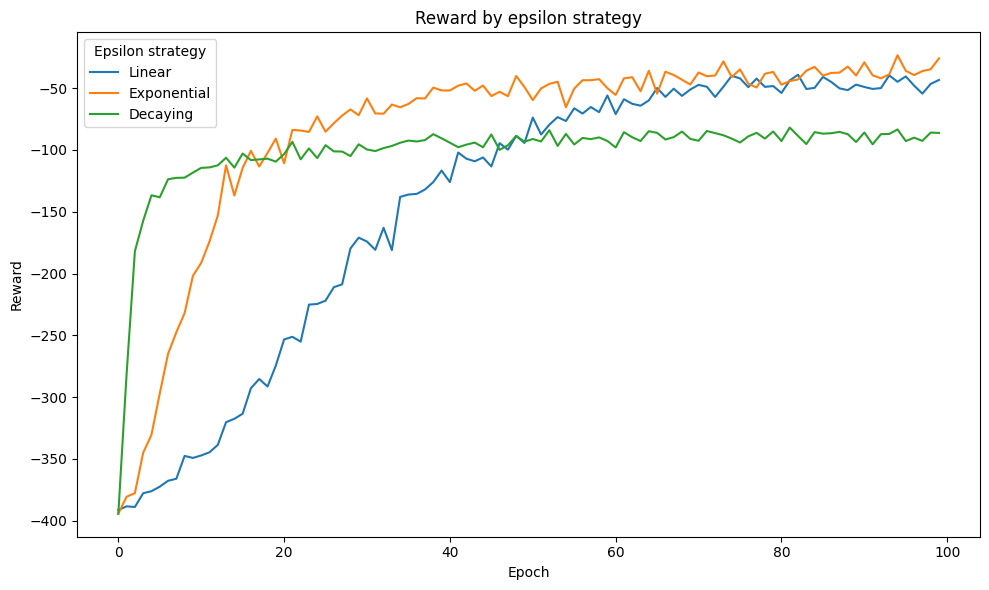

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(data=df, x='epoch', y='reward', hue='strategy', markers=True)

# Set axis labels and title
plt.xlabel('Epoch')
plt.ylabel('Reward')
plt.title('Reward by epsilon strategy')

# Show legend
plt.legend(title='Epsilon strategy')

# Show the plot
plt.tight_layout()
plt.show()

В данном случае рассматривались 3 раз разных эпсилон стратегии:
* Linear - линейная, предоставленная на семинаре `epsilon = 1 - episode / episode_n`
* Exponential - экспоненциальная, на каждом шаге epsilon умножается на коэффициент, так чтоб к последней итерации он был близок к нулю `epsilon = epsilon * 0.99996`
* Decaying - гиперболическая, `epsilon = 1 / ((episode // 1000) + 1)`

Из графиков следует, что лучшие результаты показывает экспоненциальная стратегия, её результаты близки, но чуть лучше, чем у линейной. Гиперболическая сильно хуже для данной среды.